In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN

In [2]:
data = pd.read_csv('./직무능력평가.csv')
data.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[:5]

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [4]:
df_y = data_scaled[:,0]
df_x = data_scaled[:,1::]

Text(0, 0.5, 'sample index')

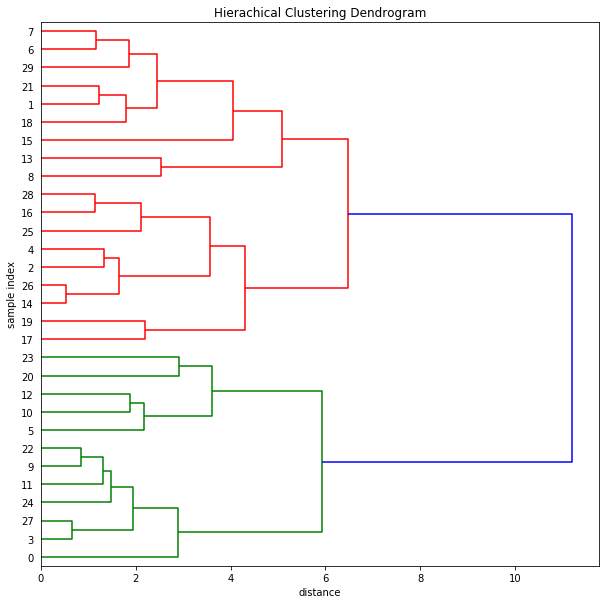

In [5]:
Z_ward = linkage(df_x, method='ward',metric="euclidean")
Z_average = linkage(df_x,method='average',metric='euclidean')
Z_Minkowski = linkage(df_x,method='average',metric='minkowski')

plt.figure(figsize=(10,10))
ax = plt.subplot(111)
dendrogram(Z_ward,leaf_font_size=10,orientation="right")
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [6]:
cluster_hierarchical = fcluster(Z=Z_ward, t=5, criterion="distance")
data["ClusterHierarchical"]=cluster_hierarchical
data.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


In [7]:
df_summary_hc = data.groupby('ClusterHierarchical').agg(["min",'mean','max'])

level0 = df_summary_hc.columns.get_level_values(0)
level1 = df_summary_hc.columns.get_level_values(1)

df_summary_hc.columns = level0+'_'+level1
df_summary_hc.reset_index(inplace=True)
df_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [8]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
cluster_error = []

for n_clus in cluster_range:
    clus = KMeans(n_clus)
    clus.fit(df_x)
    cluster_error.append(clus.inertia_)

df_error = pd.DataFrame({"NumberOfCluster":cluster_range,"Error":cluster_error})
df_error.round(3)

,NumberOfCluster,Error
0,1,180.000
1,2,114.083
2,3,93.637
3,4,79.953
4,5,65.579
5,6,57.961
6,7,50.574
7,8,45.242
8,9,39.105
9,10,34.428


Text(0, 0.5, 'Sum of squared distance')

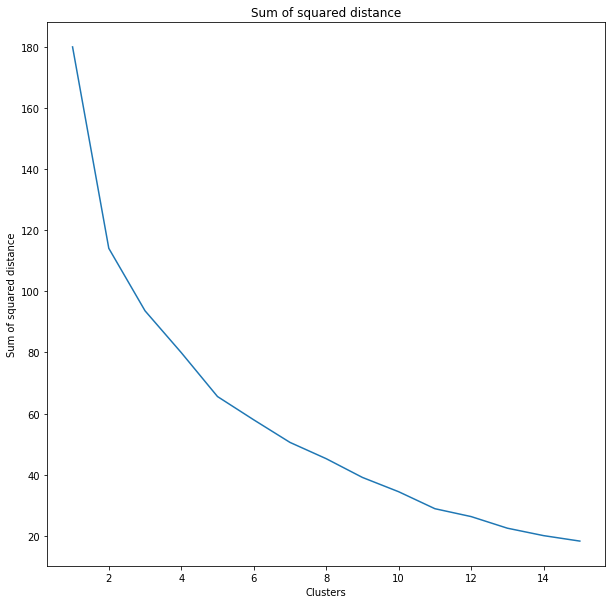

In [9]:
plt.figure(figsize=(10,10))
plt.plot(df_error.NumberOfCluster,df_error.Error)
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [10]:
clus = KMeans(5)
clus.fit(df_x)
cluster_kmeans = [i+1 for i in clus.labels_]
data["ClusterKmeans"] = cluster_kmeans
data.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,3
1,63,64,51,54,63,73,47,5,4
2,71,70,68,69,76,86,48,3,2
3,61,63,45,47,54,84,35,1,3
4,81,78,56,66,71,83,47,3,2


In [11]:
df_summary_km = data.drop("ClusterHierarchical",axis=1).groupby('ClusterKmeans').agg(["min",'mean','max'])

level0 = df_summary_km.columns.get_level_values(0)
level1 = df_summary_km.columns.get_level_values(1)

df_summary_km.columns = level0+'_'+level1
df_summary_km.reset_index(inplace=True)
df_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,40,50.500,69,37,48.500,62,33,45.250,57,...,58,43,50.500,55,49,58.250,64,25,35.250,49
1,2,65,73.400,85,60,75.900,85,46,62.000,72,...,75,55,75.100,88,74,80.100,86,31,51.700,72
2,3,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
3,4,58,69.000,82,53,70.286,90,39,48.143,53,...,72,58,63.857,70,54,69.429,80,34,39.000,47
4,5,50,59.000,68,58,70.500,83,68,75.500,83,...,54,59,61.500,64,77,77.500,78,35,43.500,52


AttributeError: Unknown property maker

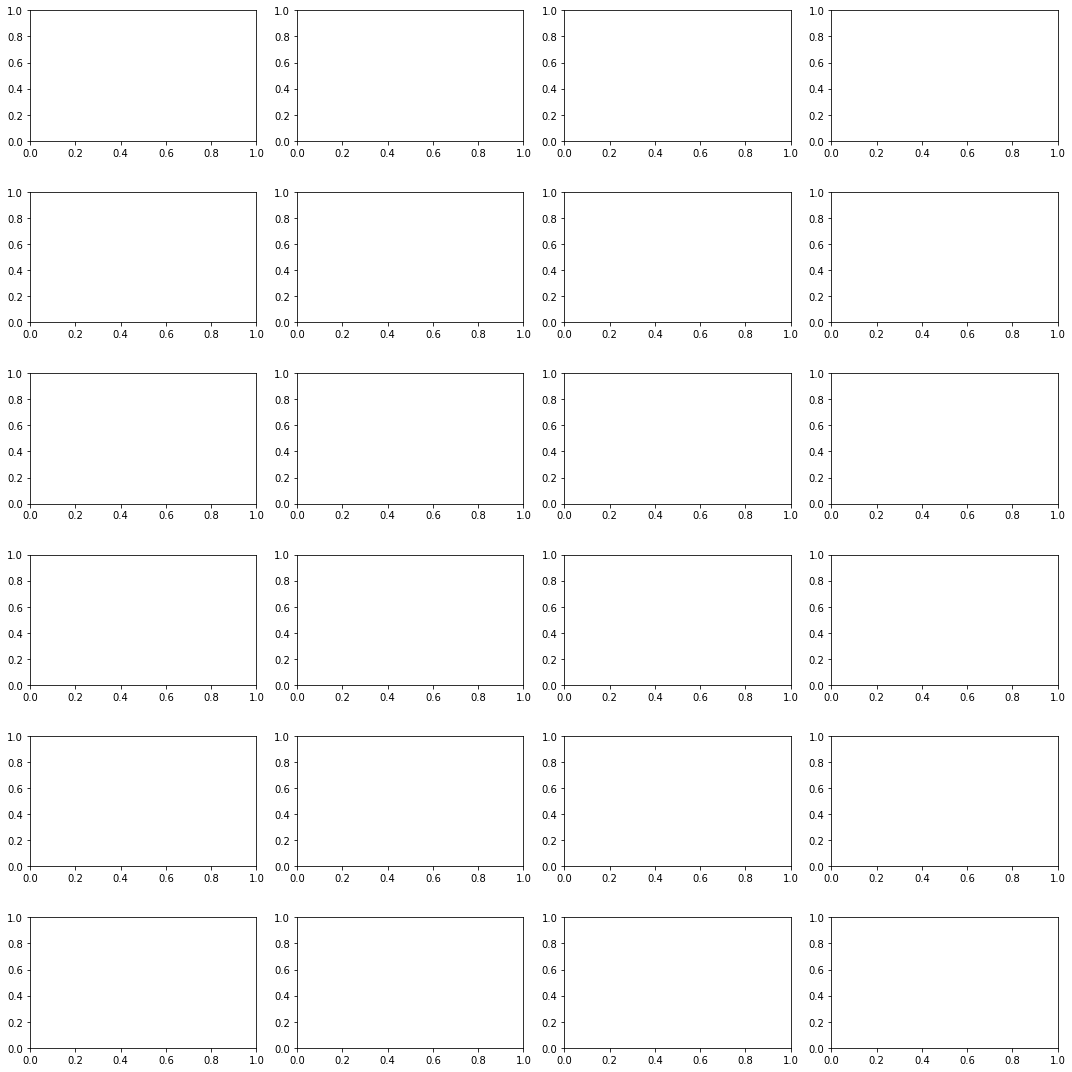

In [25]:
X = data.DISSATIS
Y = data.CHANCE

makers = ["o",'v','^','s','<','>','p','D']

para_eps = [k/10 for k in range(10,16,1)]
para_min_sample = [2,3,4,5]

fig,axes = plt.subplots(len(para_eps),len(para_min_sample),figsize = (15,15))
fig.tight_layout(w_pad=1,h_pad=3)

for i,eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample,eps=eps)
        clusters = dbscan.fit_predict(df_x)
        clusters = clusters +1
        
        for (n_clus, clus) in enumerate(range(min(clusters),max(clusters)+1,1)):
            axes[i,j].scatter(X[clusters == clus], Y[clusters == clus], maker=makers[n_clus],s=100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample="+str(min_sample)+"\n # of cluster = "+str(max(clusters)),fontsize=15)
            

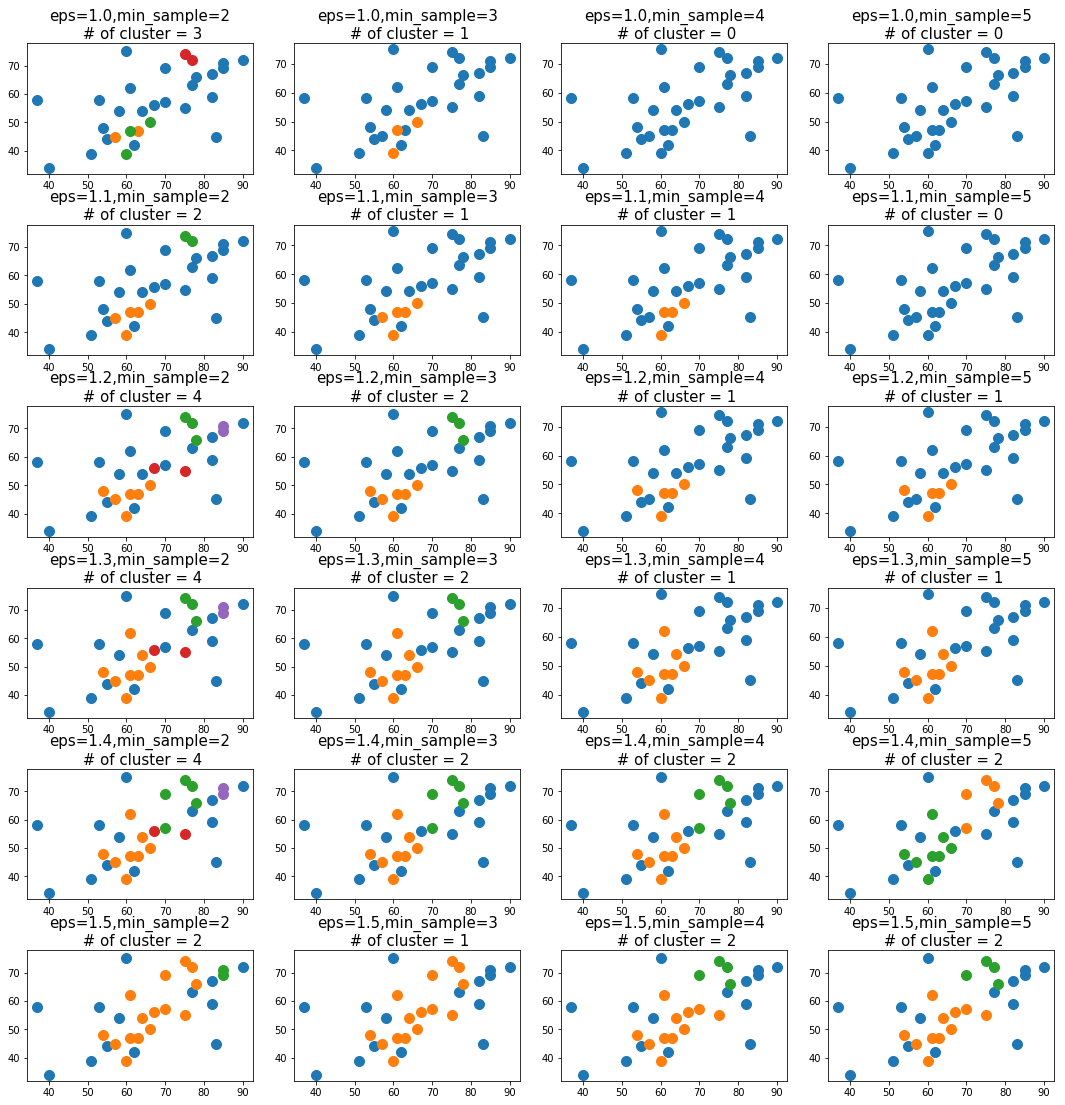

In [30]:
X = data.DISSATIS
Y = data.CHANCE

# makers = ['v','^','s','<','>','p','D']

para_eps = [k/10 for k in range(10,16,1)]
para_min_sample = [2,3,4,5]

fig,axes = plt.subplots(len(para_eps),len(para_min_sample),figsize = (15,15))
fig.tight_layout(w_pad=1,h_pad=3)

for i,eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample,eps=eps)
        clusters = dbscan.fit_predict(df_x)
        clusters = clusters +1
        
        for (n_clus, clus) in enumerate(range(min(clusters),max(clusters)+1,1)):
#             print(makers[n_clus])
            axes[i,j].scatter(X[clusters == clus], Y[clusters == clus], s=100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample="+str(min_sample)+"\n # of cluster = "+str(max(clusters)),fontsize=15)
            

In [36]:
dbscan = DBSCAN(eps=1.4,min_samples=2).fit(df_x)
cluster_dbscan = dbscan.labels_

for i,val in enumerate(cluster_dbscan):
    if val <0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
        
data["ClusterDBScan"] = cluster_dbscan
data.head()          

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,3,0
1,63,64,51,54,63,73,47,5,4,1
2,71,70,68,69,76,86,48,3,2,2
3,61,63,45,47,54,84,35,1,3,1
4,81,78,56,66,71,83,47,3,2,2


In [38]:
df_summary_db = data.drop(['ClusterHierarchical','ClusterKmeans'],axis=1).groupby("ClusterDBScan").agg(['min','mean','max'])
level0 = df_summary_db.columns.get_level_values(0)
level1 = df_summary_db.columns.get_level_values(1)

df_summary_db.columns = level0+'_'+level1
df_summary_db.reset_index(inplace=True)
df_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
